In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
np.random.seed(42)

from matplotlib import rcParams
rcParams.update({'figure.autolayout':True})

plt.style.use(["presentation"])

%matplotlib inline

In [2]:
prediction_data=pd.read_csv('./assets/test.csv')

In [3]:
working_data=pd.read_csv('./assets/train.csv')

In [4]:
NOAA=pd.read_csv('./assets/weather.csv')

In [5]:
spray=pd.read_csv('./assets/spray.csv')

In [6]:
train, test=train_test_split(working_data, test_size=.20, random_state=523)

In [7]:
# Looking at the Data
working_data.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [8]:
# data types and missing values
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [9]:
working_data.isnull().sum().any()  # checking any missing values

False

In [10]:
# checking statistics for each columns
working_data.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [11]:
working_data.describe(include= 'all')

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506,10506,10506,10506.000000,10506,10506,10506,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
unique,95,138,7,NaN,128,136,138,NaN,NaN,NaN,NaN,NaN
top,2007-08-01,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,NaN,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",NaN,NaN,NaN,NaN,NaN
freq,551,750,4752,NaN,750,750,750,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,35.687797,NaN,NaN,NaN,41.841139,-87.699908,7.819532,12.853512,0.052446
std,NaN,NaN,NaN,24.339468,NaN,NaN,NaN,0.112742,0.096514,1.452921,16.133816,0.222936
min,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,41.954690,-87.627796,9.000000,17.000000,0.000000


In [12]:
working_data['WnvPresent'].describe()

count    10506.000000
mean         0.052446
std          0.222936
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: WnvPresent, dtype: float64

In [13]:
correlations_working_data = working_data.corr()['WnvPresent'].sort_values()
print(correlations_working_data.head(10),'\n')
print(correlations_working_data.tail(10))

Longitude         -0.060345
Block              0.004877
AddressAccuracy    0.008064
Latitude           0.028697
NumMosquitos       0.196820
WnvPresent         1.000000
Name: WnvPresent, dtype: float64 

Longitude         -0.060345
Block              0.004877
AddressAccuracy    0.008064
Latitude           0.028697
NumMosquitos       0.196820
WnvPresent         1.000000
Name: WnvPresent, dtype: float64


In [14]:
working_data['Date'] = pd.to_datetime(working_data['Date'])

In [15]:
mask1 = working_data['Date'] == '2013-09-26'
mask2 = working_data['Trap'] == 'T900'
working_data[mask1 & mask2]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
10484,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,39,1
10485,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,4,0
10486,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,16,0
10487,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,9,0
10488,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,11,0
10489,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,1,0


In [16]:
eda = working_data.pivot_table(index=['Date','Species','Trap','Latitude','Longitude'], values=['NumMosquitos','WnvPresent'], aggfunc=np.sum)
eda = eda.reset_index()
eda['y'] = (eda['WnvPresent'] >= 1) * 1
eda.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,y
0,2007-05-29,CULEX PIPIENS,T096,41.731922,-87.677512,1,0,0
1,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,0
2,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,1,0,0
4,2007-05-29,CULEX PIPIENS/RESTUANS,T050,41.919343,-87.694259,1,0,0


C:\Users\kiraz\AppData\Local\conda\conda\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


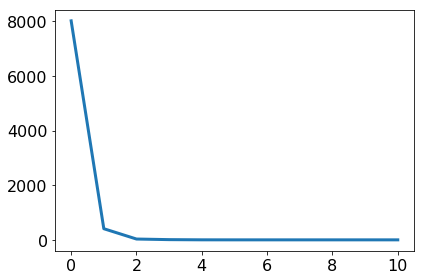

In [17]:
eda['WnvPresent'].value_counts().sort_index().plot()

In [18]:
eda['WnvPresent'].value_counts().sort_index()

0     8018
1      409
2       31
3        9
4        2
5        1
6        1
7        1
8        1
9        1
10       1
Name: WnvPresent, dtype: int64

C:\Users\kiraz\AppData\Local\conda\conda\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


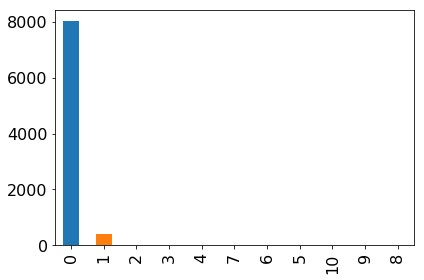

In [19]:
eda['WnvPresent'].value_counts().plot.bar()

In [20]:
eda['y'].value_counts()

0    8018
1     457
Name: y, dtype: int64

C:\Users\kiraz\AppData\Local\conda\conda\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


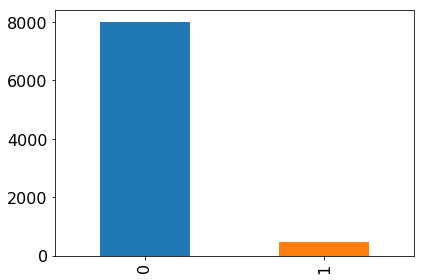

In [21]:
eda['y'].value_counts().plot.bar()

C:\Users\kiraz\AppData\Local\conda\conda\envs\dsi\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


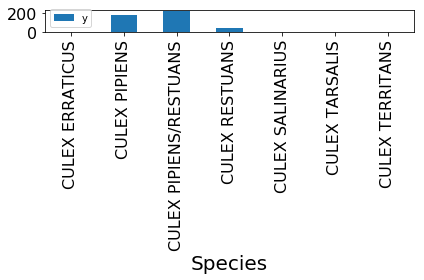

In [22]:
eda.pivot_table(index='Species',values='y', aggfunc=np.sum).plot.bar()

In [23]:
eda.columns

Index(['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos',
       'WnvPresent', 'y'],
      dtype='object')

In [24]:
NOAA=pd.read_csv('./assets/weather.csv')

In [25]:
NOAA.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [26]:
NOAA['SnowFall'][NOAA['SnowFall']!='0.0'].value_counts()

M      1472
  T      12
0.1       1
Name: SnowFall, dtype: int64

In [27]:
NOAA['Water1'].value_counts()

M    2944
Name: Water1, dtype: int64

In [28]:
NOAA = NOAA.drop(['Depart', 'Sunrise', 'Sunset', 'Depth', 'CodeSum', 'Water1' ,'SnowFall'] , axis=1)

In [29]:
NOAA.head(3)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,0,2,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,0,3,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,47,14,0,0.00,29.38,30.09,13.0,4,13.4


In [30]:
NOAA.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [31]:
NOAA = NOAA.replace('M', -9999)
NOAA = NOAA.replace('  T', -9999)

In [32]:
NOAA.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [33]:
NOAA.isnull().describe()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
count,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944


In [34]:
indices =['Station','Date']
otherindices = NOAA.columns.difference(indices)

In [35]:
NOAA[otherindices] =NOAA[otherindices].astype(float)

In [36]:
NOAA['joinID'] = NOAA['Date'].astype(str)+NOAA['Station'].astype(str)
NOAA.head(3)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,joinID
0,1,2007-05-01,83.0,50.0,67.0,51.0,56.0,0.0,2.0,0.0,29.10,29.82,1.7,27.0,9.2,2007-05-011
1,2,2007-05-01,84.0,52.0,68.0,51.0,57.0,0.0,3.0,0.0,29.18,29.82,2.7,25.0,9.6,2007-05-012
2,1,2007-05-02,59.0,42.0,51.0,42.0,47.0,14.0,0.0,0.0,29.38,30.09,13.0,4.0,13.4,2007-05-021


Location Mapping

In [37]:
def mapStation(loc):
    station1 = np.array([41.995,-87.933])
    station2 = np.array([41.786,-87.752])
    testStation = np.array([loc[0],loc[1]])
    distance1 = np.linalg.norm(station1-testStation)
    distance2 = np.linalg.norm(station2-testStation)
    #print(distance1,distance2)
    if distance1 < distance2 : return 1
    return 2

In [38]:
#train set
lat_lon = working_data[['Latitude','Longitude']].copy()
working_data['Station'] = lat_lon.apply(mapStation, axis=1)

In [39]:
working_data.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1


In [40]:
# drop Addresses, NumMosquitos
working_data = working_data[['Date','Station','Species','WnvPresent']]
working_data['joinID'] = working_data['Date'].astype(str)+working_data['Station'].astype(str)

In [41]:
working_data.head(3)

,Date,Station,Species,WnvPresent,joinID
0,2007-05-29,1,CULEX PIPIENS/RESTUANS,0,2007-05-291
1,2007-05-29,1,CULEX RESTUANS,0,2007-05-291
2,2007-05-29,1,CULEX RESTUANS,0,2007-05-291


In [42]:
working_data = working_data.merge(NOAA, on='joinID', how='inner')
working_data.head(3)

,Date_x,Station_x,Species,WnvPresent,joinID,Station_y,Date_y,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,1,CULEX PIPIENS/RESTUANS,0,2007-05-291,1,2007-05-29,88.0,60.0,74.0,58.0,65.0,0.0,9.0,0.0,29.39,30.11,5.8,18.0,6.5
1,2007-05-29,1,CULEX RESTUANS,0,2007-05-291,1,2007-05-29,88.0,60.0,74.0,58.0,65.0,0.0,9.0,0.0,29.39,30.11,5.8,18.0,6.5
2,2007-05-29,1,CULEX RESTUANS,0,2007-05-291,1,2007-05-29,88.0,60.0,74.0,58.0,65.0,0.0,9.0,0.0,29.39,30.11,5.8,18.0,6.5
